# The Battle of Neighborhoods - London

### Introduction / Business Problem

Nowadays, crimes are a very corcerning topic in which people are afraid and want to take the more precautions to avoid been involved in one. Most of all, if you have the possibility to establish where to live, work, do shopping, and many things it would be important for you to know to decide where to.

This final course project consists in describing the total crimes that were committed in London between 2008 and 2016. This crimes would be clustered in Boroughs to determine which ones have the highest levels of crimes. Clustering would take place by K-means.

Moreover, the report would give us the chance to determine in which Borough would be better to open a restaurant or start a business. So the aim of the project would be to everyone who is interested in investing in London. Also, to the ones that want to travel to London so they would avoid some Boroughs or take the necessary precautions.

### Data

In regards to the explanation of our businees problem, we will use the following data:

1. A csv file found in Kaggle which gives the information in regards to the Boroughs in London, and the category and number of crimes committed.
2. Determine the coordinates for each Borough so we can cluster them.

The data extraction would be from: https://www.kaggle.com/jboysen/london-crime/data which is a csv file.   
For coordinations we would use the following:
1. https://en.wikipedia.org/wiki/List_of_London_boroughs
2. https://latitude.to/satellite-map/gb/united-kingdom/4105/list-of-london-boroughs

Once we process the data, and determine which are the top 5 Boroughs that have the most number of crimes, and determine the top 5 Boroughs with the least crimes, we will have the possibility to tell investors or travelers which Boroughs are safest to visit or establish.

Finally, with that information we would also help local officers to be concern in which Boroughs are the most crimes committed so they take action to improve that numbers.

### Methodology

To develop our project we will use the following:

1. Visualize the total crimes un the Boroughs and determine the safest one.
2. Show 2 bargraphs with the top 5 safest and most dangerous Boroughs.
3. Determine the latitude and longitude to put them in a folium map.
4. Cluster this Boroughs in London so it would be easy for the aim public to locate them.

So, from this point on we will start the notebook.

In [3]:
import requests
import pandas as pd
import numpy as np 
import random

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize

!pip install folium
import folium 

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    future-0.18.2              |   py36h9f0ad1d_1         714 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                  

In [11]:
#Define credentials for Foursquare
CLIENT_ID = 'ZN2L3CGKQ4PTEIMVFQLQL41HQ4Y44ZR0EH1EBTBI0G1ZHO1N'
CLIENT_SECRET = '1S3XLSFYGSRPQT142ZZXOSMSP0OV02J4TVRFPHPVRFTAPQGD' 

VERSION = '20180604'
LIMIT = 30

In [4]:
df = pd.read_csv("london_crime_by_lsoa.csv")
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0.0,2016.0,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0.0,2016.0,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0.0,2015.0,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0.0,2016.0,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0.0,2008.0,6.0


In [5]:
#Taking crimes in 2016
df.drop(df.index[df['year'] != 2016], inplace = True)
df = df[df.value != 0]
df = df.reset_index(drop=True)
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1.0,2016.0,8.0
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1.0,2016.0,4.0
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4.0,2016.0,8.0
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1.0,2016.0,8.0
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2.0,2016.0,11.0


In [6]:
#Changing columns name
df.columns = ['LSOA_Code', 'Borough','Major_Category','Minor_Category','No_of_Crimes','Year','Month']
df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,No_of_Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1.0,2016.0,8.0
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1.0,2016.0,4.0
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4.0,2016.0,8.0
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1.0,2016.0,8.0
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2.0,2016.0,11.0


In [7]:
#Total crimes per Major Category in each Borough
df['Major_Category'].value_counts()

Theft and Handling             2906
Violence Against the Person    2792
Criminal Damage                1101
Burglary                        972
Drugs                           481
Robbery                         310
Other Notifiable Offences       262
Name: Major_Category, dtype: int64

In [8]:
#Grouping by each major crime
London_crime = pd.pivot_table(df,values=['No_of_Crimes'],
                               index=['Borough'],
                               columns=['Major_Category'],
                               aggfunc=np.sum,fill_value=0)
London_crime.head()

No_of_Crimes                        \
Major_Category           Burglary Criminal Damage Drugs   
Borough                                                   
Barking and Dagenham           35              50    20   
Barnet                         69              43    18   
Bexley                         27              51    20   
Brent                          63              46    30   
Bromley                        44              43    12   

                                                                           \
Major_Category       Other Notifiable Offences Robbery Theft and Handling   
Borough                                                                     
Barking and Dagenham                        14       9                120   
Barnet                                      15      10                191   
Bexley                                       5       3                 94   
Brent                                       16      15                181   
Bromley                                     11       4                172   

                                                  
Major_Category       Violence Against the Person  
Borough                                           
Barking and Dagenham                         108  
Barnet                                       142  
Bexley                                       107  
Brent                                        202  
Bromley                                      154

In [9]:
# Sum of crime for total crimes per Borough
London_crime.reset_index(inplace = True)
London_crime['Total'] = London_crime.sum(axis=1)
London_crime.columns = London_crime.columns.map(''.join)
London_crime.head()

,Borough,No_of_CrimesBurglary,No_of_CrimesCriminal Damage,No_of_CrimesDrugs,No_of_CrimesOther Notifiable Offences,No_of_CrimesRobbery,No_of_CrimesTheft and Handling,No_of_CrimesViolence Against the Person,Total
0,Barking and Dagenham,35,50,20,14,9,120,108,356
1,Barnet,69,43,18,15,10,191,142,488
2,Bexley,27,51,20,5,3,94,107,307
3,Brent,63,46,30,16,15,181,202,553
4,Bromley,44,43,12,11,4,172,154,440


In [10]:
#Renaming columns for better understanding
London_crime.columns = ['Borough','Burglary', 'Criminal Damage','Drugs','Other Notifiable Offences',
                        'Robbery','Theft and Handling','Violence Against the Person','Total']
London_crime.head()

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
0,Barking and Dagenham,35,50,20,14,9,120,108,356
1,Barnet,69,43,18,15,10,191,142,488
2,Bexley,27,51,20,5,3,94,107,307
3,Brent,63,46,30,16,15,181,202,553
4,Bromley,44,43,12,11,4,172,154,440


In [17]:
#Import more libraries for bargraphs
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
#Find the 5 more dangerous Boroughs
London_crime.sort_values(['Total'], ascending = False, axis = 0, inplace = True )
df_top5 = London_crime.head() 
df_top5

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
32,Westminster,60,67,89,22,34,573,308,1153
24,Newham,36,41,54,14,28,398,206,777
27,Southwark,80,76,52,19,24,282,241,774
21,Lambeth,53,60,86,15,23,316,189,742
7,Croydon,43,73,25,16,16,272,271,716


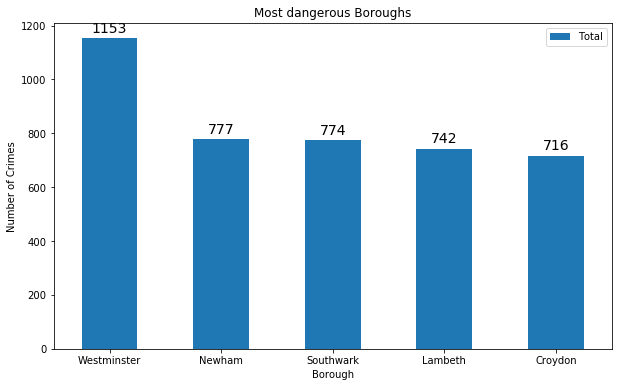

In [19]:
#Bargraph for the top 5
df_dangerous = df_top5[['Borough','Total']]
df_dangerous.set_index('Borough',inplace = True)
ax = df_dangerous.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Borough') 
ax.set_title('Most dangerous Boroughs') 

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

This would be the 5 Boroughs that should be avoid to establish a business.

In [21]:
#Find the 5 safest Boroughs
London_crime.sort_values(['Total'], ascending = True, axis = 0, inplace = True )
df_bot5 = London_crime.head() 
df_bot5

,Borough,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person,Total
6,City of London,0,0,0,0,0,2,1,3
20,Kingston upon Thames,16,23,15,6,1,81,70,212
26,Richmond upon Thames,28,37,5,2,1,92,66,231
28,Sutton,18,28,6,4,2,114,75,247
23,Merton,27,31,7,4,5,115,89,278


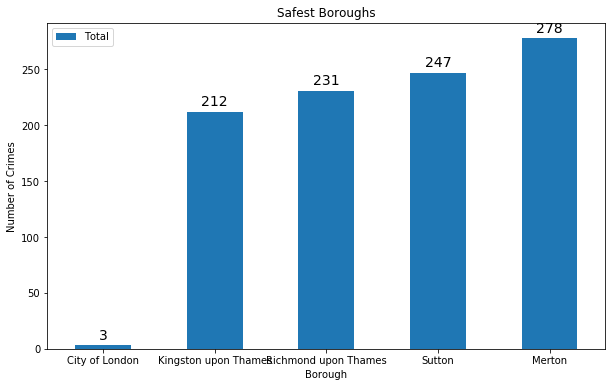

In [22]:
#Bargraph for the bot 5
df_safest = df_bot5[['Borough','Total']]
df_safest.set_index('Borough',inplace = True)
ax = df_safest.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Crimes') 
ax.set_xlabel('Borough')
ax.set_title('Safest Boroughs')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

This are the 5 safest Boroughs in which you would consider to open a business.

In [24]:
#Open json coordinates info for London
import json
with open('coordinates.json') as json_data:
    london_data = json.load(json_data)

In [26]:
london_data

{'DD': {'lat': 51.5607, 'lng': 0.1557},
 'DMS': {'lat': '51º33\'38.52" N', 'lng': '0º09\'20.52" E'},
 'geohash': 'u10j7d36u5',
 'UTM': '31U 302850.05503661 5716014.1691097'}

In [64]:
#Generating table and coordinates
Borough = ['City of London','Kingston upon Thames','Richmond upon Thames','Sutton',
          'Merton']

Latitude = ['51.5155','51.4085','51.4479','51.3618','51.4014']
Longitude = ['-0.0922','-0.3064','-0.3260','-0.0804','-0.1958']

df_bor = {'Borough':Borough,'Latitude': Latitude,'Longitude':Longitude}
coord_bor = pd.DataFrame(data=df_bor, columns=['Borough', 'Latitude', 'Longitude'], index=None)

coord_bor

,Borough,Latitude,Longitude
0,City of London,51.5155,-0.0922
1,Kingston upon Thames,51.4085,-0.3064
2,Richmond upon Thames,51.4479,-0.3260
3,Sutton,51.3618,-0.0804
4,Merton,51.4014,-0.1958


In [65]:
coord_bor.dtypes

Borough      object
Latitude     object
Longitude    object
dtype: object

In [66]:
coord_bor['Latitude'] = coord_bor['Latitude'].astype(float)
coord_bor['Longitude'] = coord_bor['Longitude'].astype(float)

In [67]:
coord_bor.dtypes

Borough       object
Latitude     float64
Longitude    float64
dtype: object

In [86]:
#Generating map
london_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

for lat, lng, borough, in zip(coord_bor['Latitude'], coord_bor['Longitude'], coord_bor['Borough']):
    label = folium.Popup(borough, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(london_map)  
    
london_map

### Results and Discussion

The aim of the project would be to everyone who is interested in investing in London have the chance to determine in which Borough would be better to open a restaurant or start a business. So we discuse the best Boroughs so they have success and avoid any possible trouble.  
With the following project and objectives we state we get the following results:

1. We should avoid the following Boroughs:
    - Westminster
    - Newham
    - Southwark
    - Lambeth
    - Croydon
2. We should take in consideration the following Boroughs:
    - City of London
    - Kingston upon Thames
    - Richmond upon Thames
    - Sutton
    - Merton
3. With the folium map proyected they would find out the distance between each other if they decide to live and work in different ones.

### Conclusion

To conclude, this project get a better understanding of the principal Boroughs in which it's dangerous and safest to start a restaurant, open a business, or even if you are planning to move there or just have a nice day. Safety is a primary concern for everyone nowadays, so this project would help them to feel secure.